In [3]:
import numpy as np
import pandas as pd 
import seaborn as sns

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
معرفی مجموعه داده
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
داده آموزشی دارای ۲۱ ستون و ۹۳۸ سطر است که هر سطر اطلاعات یک بازیکن را نشان می‌دهد.
    <br>
    در جدول زیر، ستون‌های دیتافریم و توضیحات هر یک را مشاهده می‌کنیم:
</font>
</p>


<div dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    
|ستون|توضیحات|
|:------:|:---:|
|name|نام بازیکن|
|gp|تعداد بازی‌هایی که بازیکن در آن حضور داشته است|
|min|تعداد دقایقی که بازیکن در زمین حضور داشته است|
|pts|تعداد امتیازی که بازیکن به طور میانگین در هر بازی کسب کرده است|
|fgm|میانگین گل‌هایی که در جریان بازی به ثمر رسانده است|
|fga|میانگین تلاش‌هایی که برای به ثمر رساندن گل در جریان بازی کرده است|
|fg|درصد گل‌های درحال بازی|
|3p_made|میانگین گل‌های ۳ امتیازی که در هر بازی به ثمر رسانده است|
|3pa|میانگین تلاش‌هایی که برای به ثمر رساندن گل ۳ امتیازی در هر بازی کرده است|
|3p|درصد گل‌های ۳ امتیازی در هر بازی|
|ftm|میانگین گل‌هایی که با پرتاب آزاد در هر بازی که به ثمر رسانده است|
|fta|میانگین پرتاب‌های آزاد که در هر بازی داشته است|
|ft|میانگین گل‌هایی که با پرتاب آزاد به ثمر رسیده اند|
|oreb|میانگین ریباند‌های تهاجمی|
|dreb|میانگین ریباند‌های تدافعی|
|reb|میانگین ریباندها|
|ast|میانگین پاس گل|
|stl|میانگین توپ‌ربایی|
|blk|میانگین دفعاتی که بازیکن سد توب کرده است|
|tov|میانگین دفعاتی که بازیگن توپ را از دست داده است|
|target_5yrs|آیا بازیکن به مدت ۵ سال در NBA می‌ماند یا خیر|
    
</font>
</div>


In [6]:
df = pd.read_csv('../data/nba_players_train.csv')
df

,name,gp,min,pts,fgm,fga,fg,3p_made,3pa,3p,...,fta,ft,oreb,dreb,reb,ast,stl,blk,tov,target_5yrs
0,James Young,31,10.7,3.4,1.2,3.3,35.3,0.5,2.1,25.8,...,0.9,55.2,0.3,1.1,1.4,0.4,0.3,0.1,0.2,0
1,Michael Anderson,65,18.5,7.4,2.9,5.8,50.1,0.0,0.1,0.0,...,2.7,57.1,1.8,2.7,4.5,1.0,1.0,0.3,1.2,0
2,Kobe Bryant,71,15.5,7.6,2.5,5.9,41.7,0.7,1.9,37.5,...,2.3,81.9,0.7,1.2,1.9,1.3,0.7,0.3,1.6,1
3,Darrin Hancock,46,9.2,3.3,1.5,2.6,56.2,0.0,0.1,33.3,...,0.8,41.0,0.3,0.8,1.2,0.7,0.4,0.1,0.7,0
4,Brent Price,68,12.6,3.9,1.5,4.1,35.8,0.1,0.7,16.7,...,1.0,79.4,0.4,1.1,1.5,2.3,0.8,0.0,1.3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
933,Terry Dehere,64,11.9,5.3,2.0,5.3,37.7,0.4,0.9,40.4,...,1.3,75.3,0.4,0.7,1.1,1.2,0.4,0.1,0.9,1
934,Jordan Hamilton,26,9.9,4.4,1.8,4.3,43.2,0.7,1.8,36.2,...,0.2,40.0,0.4,2.0,2.4,0.8,0.1,0.1,0.6,1
935,David Lee,67,16.9,5.1,2.0,3.4,59.6,0.0,0.0,0.0,...,1.8,57.7,1.6,2.9,4.5,0.6,0.5,0.3,0.8,0
936,Travis Mays,64,33.5,14.3,4.6,11.3,40.6,1.1,3.1,36.5,...,5.2,77.0,0.8,1.9,2.8,4.0,1.3,0.2,2.5,0


In [14]:
# modeling
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

X = df.drop(['name', 'target_5yrs'], axis=1)
y = df.target_5yrs

x_train,x_test , y_train,y_test = train_test_split(X,y, test_size=.2, random_state=313)

std_scaler = StandardScaler()
x_train = std_scaler.fit_transform(x_train)

In [15]:

model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

precision score =  0.7175572519083969


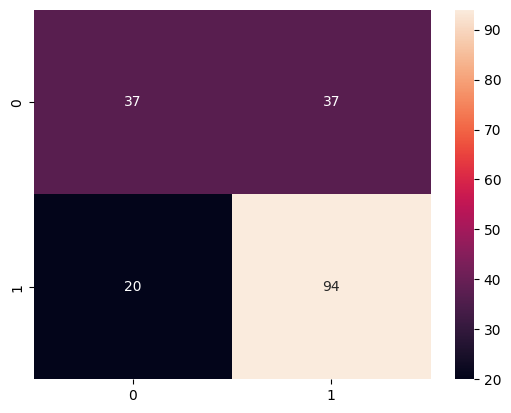

In [16]:
# evaluate model
from sklearn.metrics import confusion_matrix, precision_score

y_pred = model.predict(std_scaler.transform(x_test))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

print('precision score = ', precision_score(y_test, y_pred))